# Alzhemier's Disease Phenotype

This notebook looks at endpoints other than AD (but related to it) and examines the relationship between these endpoints and the top compounds predicited to treat AD by MechRepoNet.

## Use Previously Built Models (MRN_new_endpoints) to determine most likely connections to AD

In [1]:
import numpy as np
import pandas as pd
import utils

from pathlib import Path

In [2]:
n, e = utils.load_network()

In [3]:
from data_tools import graphs as gt

/opt/mmayers/software/anaconda3/envs/ml/lib/python3.6/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
c = gt.combine_nodes_and_edges(n, e)

In [5]:
def find_subname(substr, label=None):
    if type(label) is str:
        nodes = n.query('label == @label')
    elif type(label) == list:
        nodes = n.query('label in @label')
    else:
        nodes = n
    return nodes[nodes['name'].str.lower().str.contains(substr.lower())]

In [6]:
n.query('id == "CHEBI:135610"')

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
82094,CHEBI:135610,oxantel,ChemicalSubstance,CHEBI:135610|IKEY:PONGRCSYUVKYHY-HJONKQCASA-N|...,gvk,NaN,NaN,NaN


## Configure what go terms we think belong to what categories

In [7]:
cats = {
    'Autophagy': ['GO:0006914', 'GO:0061909', 'GO:0000045'],
    'Mitochondrial function': ['GO:0006119', 'HP:0003287', 'GO:1990046', 'GO:0030150'],
    'Neuroinflammation': ['HP:0002185', 'GO:0150076', 'GO:0150079', 'HP:0002120', 'GO:0050321'],
    'Synaptic health': ['GO:0034205', 'GO:1904783', 'GO:0098816', 'GO:0098817'],
    'Reactive astrogliosis': ['HP:0002446', 'GO:0002265', 'GO:0061889'],
    'Clinical symtopms': ['HP:0002354', 'HP:0002423', 'DOID:1307', 'DOID:0060135']
}

### Below is some searching to try and find some of the best candidate terms connected to AD

In [8]:
phenos = ['BiologicalProcessOrActivity', 'PhenotypicFeature']
alz_id = 'DOID:10652'
c.query('start_id == @alz_id and end_label in @phenos')

,start_id,end_id,type,dsrc_type,comp_type,p_val,adj_p,source,license,experiments,...,name_x,name_y,merge_id,reactome_id,abbrev,type_no_abbv,start_name,end_name,start_label,end_label
892259,DOID:10652,WD:Q30141302,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,confusion with time and space,Disease,PhenotypicFeature
892260,DOID:10652,WD:Q30141343,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,challenges in planning or solving problems,Disease,PhenotypicFeature
892261,DOID:10652,WD:Q30141359,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,"difficulty completing familiar tasks at home, ...",Disease,PhenotypicFeature
892262,DOID:10652,WD:Q30141385,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,problems with words in speaking or writing,Disease,PhenotypicFeature
892263,DOID:10652,WD:Q30141399,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,decreased or poor judgment,Disease,PhenotypicFeature
892264,DOID:10652,WD:Q30141414,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,changes in mood and personality,Disease,PhenotypicFeature
892265,DOID:10652,WD:Q30141432,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,withdrawal from work or social activities,Disease,PhenotypicFeature
892266,DOID:10652,WD:Q30141517,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,trouble understanding visual images and spatia...,Disease,PhenotypicFeature
892267,DOID:10652,WD:Q30141588,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,misplacing things and losing the ability to re...,Disease,PhenotypicFeature
892268,DOID:10652,WD:Q30141616,presents_DpsP,crowd_sourced,NaN,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,DpsP,presents,Alzheimer's disease,memory loss that disrupts daily life,Disease,PhenotypicFeature


In [9]:
find_subname('autopha', phenos)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
943,GO:0000045,autophagosome assembly,BiologicalProcessOrActivity,GO:0000045,NaN,NaN,NaN,NaN
1036,GO:0000422,autophagy of mitochondrion,BiologicalProcessOrActivity,GO:0000422,NaN,NaN,NaN,NaN
2799,GO:0006914,autophagy,BiologicalProcessOrActivity,GO:0006914,NaN,NaN,NaN,NaN
3851,GO:0010506,regulation of autophagy,BiologicalProcessOrActivity,GO:0010506,NaN,NaN,NaN,NaN
3852,GO:0010507,negative regulation of autophagy,BiologicalProcessOrActivity,GO:0010507,NaN,NaN,NaN,NaN
3853,GO:0010508,positive regulation of autophagy,BiologicalProcessOrActivity,GO:0010508,NaN,NaN,NaN,NaN
4581,GO:0016236,macroautophagy,BiologicalProcessOrActivity,GO:0016236,NaN,NaN,NaN,NaN
4582,GO:0016239,positive regulation of macroautophagy,BiologicalProcessOrActivity,GO:0016239,NaN,NaN,NaN,NaN
4583,GO:0016240,autophagosome membrane docking,BiologicalProcessOrActivity,GO:0016240,NaN,NaN,NaN,NaN
4584,GO:0016241,regulation of macroautophagy,BiologicalProcessOrActivity,GO:0016241,NaN,NaN,NaN,NaN


In [10]:
find_subname('mitochon', phenos).head(50)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
927,GO:0000002,mitochondrial genome maintenance,BiologicalProcessOrActivity,GO:0000002,NaN,NaN,NaN,NaN
995,GO:0000266,mitochondrial fission,BiologicalProcessOrActivity,GO:0000266,NaN,NaN,NaN,NaN
1036,GO:0000422,autophagy of mitochondrion,BiologicalProcessOrActivity,GO:0000422,NaN,NaN,NaN,NaN
1113,GO:0000957,mitochondrial RNA catabolic process,BiologicalProcessOrActivity,GO:0000957,NaN,NaN,NaN,NaN
1114,GO:0000958,mitochondrial mRNA catabolic process,BiologicalProcessOrActivity,GO:0000958,NaN,NaN,NaN,NaN
1115,GO:0000959,mitochondrial RNA metabolic process,BiologicalProcessOrActivity,GO:0000959,NaN,NaN,NaN,NaN
1116,GO:0000961,negative regulation of mitochondrial RNA catab...,BiologicalProcessOrActivity,GO:0000961,NaN,NaN,NaN,NaN
1117,GO:0000962,positive regulation of mitochondrial RNA catab...,BiologicalProcessOrActivity,GO:0000962,NaN,NaN,NaN,NaN
1118,GO:0000963,mitochondrial RNA processing,BiologicalProcessOrActivity,GO:0000963,NaN,NaN,NaN,NaN
1119,GO:0000964,mitochondrial RNA 5'-end processing,BiologicalProcessOrActivity,GO:0000964,NaN,NaN,NaN,NaN


In [11]:
find_subname('mitochon', phenos).head(100).tail(50)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
5984,GO:0032042,mitochondrial DNA metabolic process,BiologicalProcessOrActivity,GO:0032042,NaN,NaN,NaN,NaN
5985,GO:0032043,mitochondrial DNA catabolic process,BiologicalProcessOrActivity,GO:0032043,NaN,NaN,NaN,NaN
6215,GO:0032543,mitochondrial translation,BiologicalProcessOrActivity,GO:0032543,NaN,NaN,NaN,NaN
6427,GO:0032976,release of matrix enzymes from mitochondria,BiologicalProcessOrActivity,GO:0032976,NaN,NaN,NaN,NaN
6429,GO:0032979,protein insertion into mitochondrial membrane ...,BiologicalProcessOrActivity,GO:0032979,NaN,NaN,NaN,NaN
6431,GO:0032981,mitochondrial respiratory chain complex I asse...,BiologicalProcessOrActivity,GO:0032981,NaN,NaN,NaN,NaN
6478,GO:0033108,mitochondrial respiratory chain complex assembly,BiologicalProcessOrActivity,GO:0033108,NaN,NaN,NaN,NaN
6647,GO:0033615,mitochondrial proton-transporting ATP synthase...,BiologicalProcessOrActivity,GO:0033615,NaN,NaN,NaN,NaN
6648,GO:0033617,mitochondrial respiratory chain complex IV ass...,BiologicalProcessOrActivity,GO:0033617,NaN,NaN,NaN,NaN
6873,GO:0034514,mitochondrial unfolded protein response,BiologicalProcessOrActivity,GO:0034514,NaN,NaN,NaN,NaN


In [12]:
find_subname('mitochon', phenos).head(150).tail(50)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
11769,GO:0070096,mitochondrial outer membrane translocase compl...,BiologicalProcessOrActivity,GO:0070096,NaN,NaN,NaN,NaN
11779,GO:0070124,mitochondrial translational initiation,BiologicalProcessOrActivity,GO:0070124,NaN,NaN,NaN,NaN
11780,GO:0070125,mitochondrial translational elongation,BiologicalProcessOrActivity,GO:0070125,NaN,NaN,NaN,NaN
11781,GO:0070126,mitochondrial translational termination,BiologicalProcessOrActivity,GO:0070126,NaN,NaN,NaN,NaN
11782,GO:0070127,tRNA aminoacylation for mitochondrial protein ...,BiologicalProcessOrActivity,GO:0070127,NaN,NaN,NaN,NaN
11783,GO:0070129,regulation of mitochondrial translation,BiologicalProcessOrActivity,GO:0070129,NaN,NaN,NaN,NaN
11784,GO:0070131,positive regulation of mitochondrial translation,BiologicalProcessOrActivity,GO:0070131,NaN,NaN,NaN,NaN
11787,GO:0070143,mitochondrial alanyl-tRNA aminoacylation,BiologicalProcessOrActivity,GO:0070143,NaN,NaN,NaN,NaN
11788,GO:0070145,mitochondrial asparaginyl-tRNA aminoacylation,BiologicalProcessOrActivity,GO:0070145,NaN,NaN,NaN,NaN
11789,GO:0070150,mitochondrial glycyl-tRNA aminoacylation,BiologicalProcessOrActivity,GO:0070150,NaN,NaN,NaN,NaN


In [13]:
find_subname('mitochon', phenos).head(200).tail(50)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
13770,GO:0110098,positive regulation of calcium import into the...,BiologicalProcessOrActivity,GO:0110098,NaN,NaN,NaN,NaN
13839,GO:0140300,serine import into mitochondrion,BiologicalProcessOrActivity,GO:0140300,NaN,NaN,NaN,NaN
14046,GO:1900739,regulation of protein insertion into mitochond...,BiologicalProcessOrActivity,GO:1900739,NaN,NaN,NaN,NaN
14047,GO:1900740,positive regulation of protein insertion into ...,BiologicalProcessOrActivity,GO:1900740,NaN,NaN,NaN,NaN
14079,GO:1901028,regulation of mitochondrial outer membrane per...,BiologicalProcessOrActivity,GO:1901028,NaN,NaN,NaN,NaN
14080,GO:1901029,negative regulation of mitochondrial outer mem...,BiologicalProcessOrActivity,GO:1901029,NaN,NaN,NaN,NaN
14081,GO:1901030,positive regulation of mitochondrial outer mem...,BiologicalProcessOrActivity,GO:1901030,NaN,NaN,NaN,NaN
14346,GO:1901858,regulation of mitochondrial DNA metabolic process,BiologicalProcessOrActivity,GO:1901858,NaN,NaN,NaN,NaN
14347,GO:1901859,negative regulation of mitochondrial DNA metab...,BiologicalProcessOrActivity,GO:1901859,NaN,NaN,NaN,NaN
14348,GO:1901860,positive regulation of mitochondrial DNA metab...,BiologicalProcessOrActivity,GO:1901860,NaN,NaN,NaN,NaN


In [14]:
find_subname('mitochon', phenos).head(250).tail(50)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
15707,GO:1905090,negative regulation of parkin-mediated stimula...,BiologicalProcessOrActivity,GO:1905090,NaN,NaN,NaN,NaN
15836,GO:1905446,regulation of mitochondrial ATP synthesis coup...,BiologicalProcessOrActivity,GO:1905446,NaN,NaN,NaN,NaN
15837,GO:1905447,negative regulation of mitochondrial ATP synth...,BiologicalProcessOrActivity,GO:1905447,NaN,NaN,NaN,NaN
15838,GO:1905448,positive regulation of mitochondrial ATP synth...,BiologicalProcessOrActivity,GO:1905448,NaN,NaN,NaN,NaN
15933,GO:1905706,regulation of mitochondrial ATP synthesis coup...,BiologicalProcessOrActivity,GO:1905706,NaN,NaN,NaN,NaN
15934,GO:1905707,negative regulation of mitochondrial ATP synth...,BiologicalProcessOrActivity,GO:1905707,NaN,NaN,NaN,NaN
16028,GO:1990046,stress-induced mitochondrial fusion,BiologicalProcessOrActivity,GO:1990046,NaN,NaN,NaN,NaN
16058,GO:1990180,mitochondrial tRNA 3'-end processing,BiologicalProcessOrActivity,GO:1990180,NaN,NaN,NaN,NaN
16099,GO:1990456,mitochondrion-endoplasmic reticulum membrane t...,BiologicalProcessOrActivity,GO:1990456,NaN,NaN,NaN,NaN
16108,GO:1990519,mitochondrial pyrimidine nucleotide import,BiologicalProcessOrActivity,GO:1990519,NaN,NaN,NaN,NaN


In [15]:
find_subname('astrocy', phenos)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
1521,GO:0002265,astrocyte activation involved in immune response,BiologicalProcessOrActivity,GO:0002265,NaN,NaN,NaN,NaN
4158,GO:0014002,astrocyte development,BiologicalProcessOrActivity,GO:0014002,NaN,NaN,NaN,NaN
5342,GO:0021897,forebrain astrocyte development,BiologicalProcessOrActivity,GO:0021897,NaN,NaN,NaN,NaN
7258,GO:0035700,astrocyte chemotaxis,BiologicalProcessOrActivity,GO:0035700,NaN,NaN,NaN,NaN
7586,GO:0036520,astrocyte-dopaminergic neuron signaling,BiologicalProcessOrActivity,GO:0036520,NaN,NaN,NaN,NaN
8429,GO:0043615,astrocyte cell migration,BiologicalProcessOrActivity,GO:0043615,NaN,NaN,NaN,NaN
9632,GO:0048143,astrocyte activation,BiologicalProcessOrActivity,GO:0048143,NaN,NaN,NaN,NaN
9872,GO:0048708,astrocyte differentiation,BiologicalProcessOrActivity,GO:0048708,NaN,NaN,NaN,NaN
9874,GO:0048710,regulation of astrocyte differentiation,BiologicalProcessOrActivity,GO:0048710,NaN,NaN,NaN,NaN
9875,GO:0048711,positive regulation of astrocyte differentiation,BiologicalProcessOrActivity,GO:0048711,NaN,NaN,NaN,NaN


In [16]:
find_subname('amyloid', phenos)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
6757,GO:0034205,amyloid-beta formation,BiologicalProcessOrActivity,GO:0034205,NaN,NaN,NaN,NaN
6766,GO:0034231,islet amyloid polypeptide processing,BiologicalProcessOrActivity,GO:0034231,NaN,NaN,NaN,NaN
8148,GO:0042982,amyloid precursor protein metabolic process,BiologicalProcessOrActivity,GO:0042982,NaN,NaN,NaN,NaN
8149,GO:0042983,amyloid precursor protein biosynthetic process,BiologicalProcessOrActivity,GO:0042983,NaN,NaN,NaN,NaN
8150,GO:0042984,regulation of amyloid precursor protein biosyn...,BiologicalProcessOrActivity,GO:0042984,NaN,NaN,NaN,NaN
8151,GO:0042985,negative regulation of amyloid precursor prote...,BiologicalProcessOrActivity,GO:0042985,NaN,NaN,NaN,NaN
8152,GO:0042986,positive regulation of amyloid precursor prote...,BiologicalProcessOrActivity,GO:0042986,NaN,NaN,NaN,NaN
8153,GO:0042987,amyloid precursor protein catabolic process,BiologicalProcessOrActivity,GO:0042987,NaN,NaN,NaN,NaN
9991,GO:0050435,amyloid-beta metabolic process,BiologicalProcessOrActivity,GO:0050435,NaN,NaN,NaN,NaN
13351,GO:0097242,amyloid-beta clearance,BiologicalProcessOrActivity,GO:0097242,NaN,NaN,NaN,NaN


In [17]:
find_subname('tau', phenos)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets
4345,GO:0015734,taurine transport,BiologicalProcessOrActivity,GO:0015734,NaN,NaN,NaN,NaN
4957,GO:0019449,L-cysteine catabolic process to hypotaurine,BiologicalProcessOrActivity,GO:0019449,NaN,NaN,NaN,NaN
4958,GO:0019452,L-cysteine catabolic process to taurine,BiologicalProcessOrActivity,GO:0019452,NaN,NaN,NaN,NaN
4998,GO:0019529,taurine catabolic process,BiologicalProcessOrActivity,GO:0019529,NaN,NaN,NaN,NaN
4999,GO:0019530,taurine metabolic process,BiologicalProcessOrActivity,GO:0019530,NaN,NaN,NaN,NaN
7922,GO:0042412,taurine biosynthetic process,BiologicalProcessOrActivity,GO:0042412,NaN,NaN,NaN,NaN
12796,GO:0072651,interferon-tau production,BiologicalProcessOrActivity,GO:0072651,NaN,NaN,NaN,NaN
12833,GO:0072734,cellular response to staurosporine,BiologicalProcessOrActivity,GO:0072734,NaN,NaN,NaN,NaN
14745,GO:1902947,regulation of tau-protein kinase activity,BiologicalProcessOrActivity,GO:1902947,NaN,NaN,NaN,NaN
14746,GO:1902948,negative regulation of tau-protein kinase acti...,BiologicalProcessOrActivity,GO:1902948,NaN,NaN,NaN,NaN


In [18]:
find_subname('mapt', phenos)

,id,name,label,xrefs,source,synonyms,alt_ids,subsets


In [19]:
id_to_name = n.set_index('id')['name'].to_dict()

In [20]:
for k, vs in cats.items():
    for v in vs:
        print(v, id_to_name[v])

GO:0006914 autophagy
GO:0061909 autophagosome-lysosome fusion
GO:0000045 autophagosome assembly
GO:0006119 oxidative phosphorylation
HP:0003287 Abnormality of mitochondrial metabolism
GO:1990046 stress-induced mitochondrial fusion
GO:0030150 protein import into mitochondrial matrix
HP:0002185 Neurofibrillary tangles
GO:0150076 neuroinflammatory response
GO:0150079 negative regulation of neuroinflammatory response
HP:0002120 Cerebral cortical atrophy
GO:0050321 tau-protein kinase activity
GO:0034205 amyloid-beta formation
GO:1904783 positive regulation of NMDA glutamate receptor activity
GO:0098816 mini excitatory postsynaptic potential
GO:0098817 evoked excitatory postsynaptic potential
HP:0002446 Astrocytosis
GO:0002265 astrocyte activation involved in immune response
GO:0061889 negative regulation of astrocyte activation
HP:0002354 Memory impairment
HP:0002423 Long-tract signs
DOID:1307 dementia
DOID:0060135 apraxia


In [21]:
for k, v in cats.items():
    print(k)
    for val in v:
        print(' ', val, id_to_name[val])
    print('')

Autophagy
  GO:0006914 autophagy
  GO:0061909 autophagosome-lysosome fusion
  GO:0000045 autophagosome assembly

Mitochondrial function
  GO:0006119 oxidative phosphorylation
  HP:0003287 Abnormality of mitochondrial metabolism
  GO:1990046 stress-induced mitochondrial fusion
  GO:0030150 protein import into mitochondrial matrix

Neuroinflammation
  HP:0002185 Neurofibrillary tangles
  GO:0150076 neuroinflammatory response
  GO:0150079 negative regulation of neuroinflammatory response
  HP:0002120 Cerebral cortical atrophy
  GO:0050321 tau-protein kinase activity

Synaptic health
  GO:0034205 amyloid-beta formation
  GO:1904783 positive regulation of NMDA glutamate receptor activity
  GO:0098816 mini excitatory postsynaptic potential
  GO:0098817 evoked excitatory postsynaptic potential

Reactive astrogliosis
  HP:0002446 Astrocytosis
  GO:0002265 astrocyte activation involved in immune response
  GO:0061889 negative regulation of astrocyte activation

Clinical symtopms
  HP:0002354 Me

## We have different models for different endpoints

- Compound Treats Disease
- Compound Treats Phenotype
- Compound increases Biological Process
- Compound decreases Biological Process

We have to keep track of which items belong to which edge

In [22]:
pheno_subset = ['HP:0003287', 'HP:0002185', 'HP:0002120', 'HP:0002354', 
                'HP:0002423', 'HP:0002446']
dis_subset = ['DOID:1307', 'DOID:0060135']

In [23]:
n.query('id in @pheno_subset or id in @dis_subset')[['id', 'name', 'label', 'xrefs']]

,id,name,label,xrefs
68553,DOID:0060135,apraxia,Disease,DOID:0060135|GARD:5838|ICD10CM:R48.2|MESH:D001...
73104,DOID:1307,dementia,Disease,DOID:1307|HP:0000726|ICD9CM:290.8|MESH:D003704...
189961,HP:0002120,Cerebral cortical atrophy,PhenotypicFeature,SNOMED:278849000|UMLS:C0235946
189994,HP:0002185,Neurofibrillary tangles,PhenotypicFeature,GO:0097418
190087,HP:0002354,Memory impairment,PhenotypicFeature,HP:0002354|MESH:D008569
190122,HP:0002423,Long-tract signs,PhenotypicFeature,UMLS:C1865903
190128,HP:0002446,Astrocytosis,PhenotypicFeature,MESH:D005911|SNOMED:81415000|UMLS:C3887640
190578,HP:0003287,Abnormality of mitochondrial metabolism,PhenotypicFeature,UMLS:C4021734


In [24]:
inc_bp = ['GO:0006914', 'GO:0061909', 'GO:0000422', 'GO:0006119', 'GO:0150079', 
          'GO:0030150', 'GO:0098816', 'GO:0098817', 'GO:0061889']
dec_bp = ['GO:0150076', 'GO:1990046', 'GO:1904783', 'GO:0050321', 'GO:0002265']

In [25]:
n.query('id in @inc_bp')[['id', 'name', 'label', 'xrefs']]

,id,name,label,xrefs
1036,GO:0000422,autophagy of mitochondrion,BiologicalProcessOrActivity,GO:0000422
2243,GO:0006119,oxidative phosphorylation,BiologicalProcessOrActivity,GO:0006119
2799,GO:0006914,autophagy,BiologicalProcessOrActivity,GO:0006914
5485,GO:0030150,protein import into mitochondrial matrix,BiologicalProcessOrActivity,GO:0030150
11725,GO:0061889,negative regulation of astrocyte activation,BiologicalProcessOrActivity,GO:0061889
11729,GO:0061909,autophagosome-lysosome fusion,BiologicalProcessOrActivity,GO:0061909
13560,GO:0098816,mini excitatory postsynaptic potential,BiologicalProcessOrActivity,GO:0098816
13561,GO:0098817,evoked excitatory postsynaptic potential,BiologicalProcessOrActivity,GO:0098817
13856,GO:0150079,negative regulation of neuroinflammatory response,BiologicalProcessOrActivity,GO:0150079


In [26]:
n.query('id in @dec_bp')[['id', 'name', 'label', 'xrefs']]

,id,name,label,xrefs
1521,GO:0002265,astrocyte activation involved in immune response,BiologicalProcessOrActivity,GO:0002265
13853,GO:0150076,neuroinflammatory response,BiologicalProcessOrActivity,GO:0150076
15572,GO:1904783,positive regulation of NMDA glutamate receptor...,BiologicalProcessOrActivity,GO:1904783
16028,GO:1990046,stress-induced mitochondrial fusion,BiologicalProcessOrActivity,GO:1990046
182550,GO:0050321,tau-protein kinase activity,BiologicalProcessOrActivity,GO:0050321


In [27]:
ad_res = pd.read_csv('../../metapaths/2_pipeline/15_Final_Model_Training/out/results.csv').query('disease_id == @alz_id')

In [28]:
ad_res['cid'] = ad_res['chemicalsubstance_id'].map(id_to_name)
ad_res['did'] = ad_res['disease_id'].map(id_to_name)
ad_res = ad_res.sort_values('proba', ascending=False).reset_index(drop=True)

In [29]:
ad_res.head(10)

,chemicalsubstance_id,disease_id,status,proba,cid,did
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease
3,CHEBI:42944,DOID:10652,1,0.672543,galanthamine,Alzheimer's disease
4,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease
5,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease
6,CHEBI:31580,DOID:10652,0,0.626708,ethynodiol diacetate,Alzheimer's disease
7,IKEY:XEAOPVUAMONVLA-QGZVFWFLSA-N,DOID:10652,1,0.626460,BMS-708163,Alzheimer's disease
8,CHEBI:76591,DOID:10652,0,0.617504,"(25R)-cholest-5-ene-3beta,26-diol",Alzheimer's disease
9,CHEBI:48883,DOID:10652,0,0.612621,physostigmine salicylate,Alzheimer's disease


In [30]:
ad_res.query('cid == "oxantel"')

,chemicalsubstance_id,disease_id,status,proba,cid,did
1102,CHEBI:135610,DOID:10652,0,0.106618,oxantel,Alzheimer's disease


In [31]:
ad_res.head(100).tail(10)

,chemicalsubstance_id,disease_id,status,proba,cid,did
90,CHEBI:3193,DOID:10652,0,0.377504,brucine,Alzheimer's disease
91,CHEBI:92246,DOID:10652,0,0.376190,ranitidine,Alzheimer's disease
92,CHEBI:10093,DOID:10652,0,0.372203,yohimbine,Alzheimer's disease
93,CHEBI:9288,DOID:10652,0,0.368370,streptozocin,Alzheimer's disease
94,CHEBI:28548,DOID:10652,1,0.366438,D-pinitol,Alzheimer's disease
95,CHEBI:75704,DOID:10652,0,0.365679,2-(4-chloro-2-methylphenoxy)propanoic acid,Alzheimer's disease
96,CHEBI:17748,DOID:10652,0,0.365538,thymidine,Alzheimer's disease
97,CHEBI:30621,DOID:10652,0,0.363862,diarsenic trioxide,Alzheimer's disease
98,CHEBI:49662,DOID:10652,0,0.362603,indometacin,Alzheimer's disease
99,CHEBI:27732,DOID:10652,0,0.356815,caffeine,Alzheimer's disease


In [32]:
top_100_comp = ad_res.query('status == 0').head(100)['chemicalsubstance_id'].tolist()

In [33]:
ad_res.query('chemicalsubstance_id in @top_100_comp')

,chemicalsubstance_id,disease_id,status,proba,cid,did
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease
4,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease
5,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease
...,...,...,...,...,...,...
108,CHEBI:6015,DOID:10652,0,0.349868,isoflurane,Alzheimer's disease
109,CHEBI:16842,DOID:10652,0,0.349544,formaldehyde,Alzheimer's disease
110,CHEBI:4480,DOID:10652,0,0.348165,Diacetylmonoxime,Alzheimer's disease
111,CHEBI:8060,DOID:10652,0,0.344817,Phenelzine,Alzheimer's disease


### Check Dis and Phenotype

In [34]:
from hetnet_ml.extractor import MatrixFormattedGraph

In [35]:
d_hyperp, d_tune = utils.load_hyperparameters()
d_model, d_features, d_coef = utils.load_model()

In [36]:
param_dir = Path('../0_data/manual/').resolve()

In [37]:
w = d_hyperp['w']

In [38]:
mg = MatrixFormattedGraph(n, e, start_kind='ChemicalSubstance', end_kind='Disease', w=w, n_jobs=30)

Processing node and edge data...
Initializing metagraph...
Generating adjacency matrices...


100%|██████████| 68/68 [00:54<00:00,  1.25it/s]



Determining degrees for each node and metaedge


100%|██████████| 68/68 [00:47<00:00,  1.44it/s]



Weighting matrices by degree with dampening factor 0.5665616931869023...


100%|██████████| 68/68 [00:00<00:00, 124.68it/s]


In [39]:
(pairs, feats), dwpc = mg.extract_dwpc(d_features, start_nodes=top_100_comp, end_nodes=dis_subset, n_jobs=30,
                                       return_sparse=True, sparse_df=False)

Preparing function arguments...
Calculating DWPCs...


100%|██████████| 156/156 [03:08<00:00,  1.21s/it]



Reshaping Result Matrices...


100%|██████████| 156/156 [00:00<00:00, 3060.79it/s]

Stacking columns...


In [40]:
probas = d_model.predict_proba(dwpc)[:, 1]

In [41]:
pairs['proba'] = probas

In [42]:
ad_res['treat_proba'] = ad_res['proba']

In [43]:
mrg = ad_res.query('chemicalsubstance_id in @top_100_comp').copy()
for dis in dis_subset:
    this_name = id_to_name[dis].lower().replace(' ', '_')
    this_res = pairs.query('disease_id == @dis').copy()
    this_res = this_res.rename(columns={'proba': this_name+'_proba'})
    mrg = mrg.merge(this_res[['chemicalsubstance_id', this_name+'_proba']], on='chemicalsubstance_id', how='left')
mrg

,chemicalsubstance_id,disease_id,status,proba,cid,did,treat_proba,dementia_proba,apraxia_proba
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease,0.777562,0.435943,0.004623
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease,0.741301,0.261355,0.014681
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease,0.695434,0.182607,0.008323
3,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease,0.669816,0.227438,0.025073
4,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease,0.629672,0.142639,0.012617
...,...,...,...,...,...,...,...,...,...
95,CHEBI:6015,DOID:10652,0,0.349868,isoflurane,Alzheimer's disease,0.349868,0.083074,0.011312
96,CHEBI:16842,DOID:10652,0,0.349544,formaldehyde,Alzheimer's disease,0.349544,0.080306,0.033878
97,CHEBI:4480,DOID:10652,0,0.348165,Diacetylmonoxime,Alzheimer's disease,0.348165,0.203343,0.009911
98,CHEBI:8060,DOID:10652,0,0.344817,Phenelzine,Alzheimer's disease,0.344817,0.168718,0.005523


In [44]:
p_model, p_features, p_coef = utils.load_model(param_dir.joinpath('CtP_param.json'))

In [45]:
mg.set_metapaths(end_kind='PhenotypicFeature')

In [46]:
(pairs1, feats1), dwpc1 = mg.extract_dwpc(p_features, start_nodes=top_100_comp, end_nodes=pheno_subset, n_jobs=30,
                                          return_sparse=True, sparse_df=False)

Preparing function arguments...
Calculating DWPCs...


100%|██████████| 267/267 [00:10<00:00, 25.84it/s] 



Reshaping Result Matrices...


100%|██████████| 267/267 [00:00<00:00, 3361.40it/s]

Stacking columns...


In [47]:
pairs1['proba'] = p_model.predict_proba(dwpc1)[:, 1]

In [48]:
for pheno in pheno_subset:
    this_name = id_to_name[pheno].lower().replace(' ', '_')
    this_res = pairs1.query('phenotypicfeature_id == @pheno').copy()
    this_res = this_res.rename(columns={'proba': this_name+'_proba'})
    mrg = mrg.merge(this_res[['chemicalsubstance_id', this_name+'_proba']], on='chemicalsubstance_id', how='left')
mrg

,chemicalsubstance_id,disease_id,status,proba,cid,did,treat_proba,dementia_proba,apraxia_proba,abnormality_of_mitochondrial_metabolism_proba,neurofibrillary_tangles_proba,cerebral_cortical_atrophy_proba,memory_impairment_proba,long-tract_signs_proba,astrocytosis_proba
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease,0.777562,0.435943,0.004623,0.005086,0.003805,0.003814,0.104370,0.004285,0.016486
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease,0.741301,0.261355,0.014681,0.002311,0.003822,0.003415,0.063004,0.003947,0.041547
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease,0.695434,0.182607,0.008323,0.002111,0.003523,0.003109,0.108116,0.003641,0.081040
3,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease,0.669816,0.227438,0.025073,0.002669,0.003592,0.003106,0.096263,0.003720,0.062604
4,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease,0.629672,0.142639,0.012617,0.002484,0.003726,0.003230,0.090195,0.003845,0.062018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CHEBI:6015,DOID:10652,0,0.349868,isoflurane,Alzheimer's disease,0.349868,0.083074,0.011312,0.004966,0.004351,0.004102,0.087378,0.004931,0.025652
96,CHEBI:16842,DOID:10652,0,0.349544,formaldehyde,Alzheimer's disease,0.349544,0.080306,0.033878,0.003252,0.003840,0.003332,0.079769,0.004041,0.042605
97,CHEBI:4480,DOID:10652,0,0.348165,Diacetylmonoxime,Alzheimer's disease,0.348165,0.203343,0.009911,0.005315,0.005184,0.004873,0.057967,0.005213,0.009223
98,CHEBI:8060,DOID:10652,0,0.344817,Phenelzine,Alzheimer's disease,0.344817,0.168718,0.005523,0.003851,0.004328,0.003797,0.071339,0.004392,0.013486


In [49]:
abp_model, abp_features, abp_coef = utils.load_model(param_dir.joinpath('CaBP_param.json'))
mg.set_metapaths(end_kind='BiologicalProcessOrActivity')

In [50]:
(pairs2, feats2), dwpc2 = mg.extract_dwpc(abp_features, start_nodes=top_100_comp, end_nodes=inc_bp, n_jobs=30,
                                          return_sparse=True, sparse_df=False)

Preparing function arguments...
Calculating DWPCs...


100%|██████████| 368/368 [00:06<00:00, 59.06it/s]



Reshaping Result Matrices...


100%|██████████| 368/368 [00:00<00:00, 1429.56it/s]

Stacking columns...


In [51]:
pairs2['proba'] = abp_model.predict_proba(dwpc2)[:, 1]

In [52]:
for bp in inc_bp:
    this_name = id_to_name[bp].lower().replace(' ', '_')
    this_res = pairs2.query('biologicalprocessoractivity_id == @bp').copy()
    this_res = this_res.rename(columns={'proba': this_name+'_proba'})
    mrg = mrg.merge(this_res[['chemicalsubstance_id', this_name+'_proba']], on='chemicalsubstance_id', how='left')
mrg

,chemicalsubstance_id,disease_id,status,proba,cid,did,treat_proba,dementia_proba,apraxia_proba,abnormality_of_mitochondrial_metabolism_proba,...,astrocytosis_proba,autophagy_proba,autophagosome-lysosome_fusion_proba,autophagy_of_mitochondrion_proba,oxidative_phosphorylation_proba,negative_regulation_of_neuroinflammatory_response_proba,protein_import_into_mitochondrial_matrix_proba,mini_excitatory_postsynaptic_potential_proba,evoked_excitatory_postsynaptic_potential_proba,negative_regulation_of_astrocyte_activation_proba
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease,0.777562,0.435943,0.004623,0.005086,...,0.016486,0.028289,0.002994,0.003788,0.006683,0.001266,0.001238,0.001536,0.001836,0.001244
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease,0.741301,0.261355,0.014681,0.002311,...,0.041547,0.703498,0.097697,0.242324,0.428594,0.001502,0.001437,0.002751,0.004373,0.001409
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease,0.695434,0.182607,0.008323,0.002111,...,0.081040,0.917313,0.320028,0.481167,0.698668,0.001618,0.001691,0.003566,0.005196,0.001575
3,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease,0.669816,0.227438,0.025073,0.002669,...,0.062604,0.879165,0.259583,0.487933,0.586198,0.001643,0.001557,0.003469,0.005164,0.001454
4,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease,0.629672,0.142639,0.012617,0.002484,...,0.062018,0.807591,0.142408,0.256841,0.473910,0.001472,0.001538,0.003265,0.004680,0.001437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CHEBI:6015,DOID:10652,0,0.349868,isoflurane,Alzheimer's disease,0.349868,0.083074,0.011312,0.004966,...,0.025652,0.402862,0.029862,0.040147,0.086720,0.001389,0.001434,0.002165,0.003161,0.001253
96,CHEBI:16842,DOID:10652,0,0.349544,formaldehyde,Alzheimer's disease,0.349544,0.080306,0.033878,0.003252,...,0.042605,0.655903,0.085115,0.159284,0.255464,0.001509,0.001282,0.002834,0.004362,0.001285
97,CHEBI:4480,DOID:10652,0,0.348165,Diacetylmonoxime,Alzheimer's disease,0.348165,0.203343,0.009911,0.005315,...,0.009223,0.032713,0.004538,0.005671,0.008126,0.001267,0.001238,0.001577,0.001939,0.001238
98,CHEBI:8060,DOID:10652,0,0.344817,Phenelzine,Alzheimer's disease,0.344817,0.168718,0.005523,0.003851,...,0.013486,0.058651,0.004266,0.006984,0.021575,0.001281,0.001274,0.001680,0.002237,0.001241


In [53]:
ibp_model, ibp_features, ibp_coef = utils.load_model(param_dir.joinpath('CiBP_param.json'))

In [54]:
(pairs3, feats3), dwpc3 = mg.extract_dwpc(ibp_features, start_nodes=top_100_comp, end_nodes=dec_bp, n_jobs=30,
                                          return_sparse=True, sparse_df=False)

Preparing function arguments...
Calculating DWPCs...


100%|██████████| 350/350 [00:05<00:00, 62.02it/s]



Reshaping Result Matrices...


100%|██████████| 350/350 [00:00<00:00, 2924.87it/s]

Stacking columns...


In [55]:
pairs3['proba'] = ibp_model.predict_proba(dwpc3)[:, 1]

In [56]:
for bp in dec_bp:
    this_name = id_to_name[bp].lower().replace(' ', '_')
    this_res = pairs3.query('biologicalprocessoractivity_id == @bp').copy()
    this_res = this_res.rename(columns={'proba': this_name+'_proba'})
    mrg = mrg.merge(this_res[['chemicalsubstance_id', this_name+'_proba']], on='chemicalsubstance_id', how='left')
mrg

,chemicalsubstance_id,disease_id,status,proba,cid,did,treat_proba,dementia_proba,apraxia_proba,abnormality_of_mitochondrial_metabolism_proba,...,negative_regulation_of_neuroinflammatory_response_proba,protein_import_into_mitochondrial_matrix_proba,mini_excitatory_postsynaptic_potential_proba,evoked_excitatory_postsynaptic_potential_proba,negative_regulation_of_astrocyte_activation_proba,neuroinflammatory_response_proba,stress-induced_mitochondrial_fusion_proba,positive_regulation_of_nmda_glutamate_receptor_activity_proba,tau-protein_kinase_activity_proba,astrocyte_activation_involved_in_immune_response_proba
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease,0.777562,0.435943,0.004623,0.005086,...,0.001266,0.001238,0.001536,0.001836,0.001244,0.001794,0.001347,0.001740,0.001620,0.003605
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease,0.741301,0.261355,0.014681,0.002311,...,0.001502,0.001437,0.002751,0.004373,0.001409,0.006383,0.001365,0.004642,0.002132,0.019279
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease,0.695434,0.182607,0.008323,0.002111,...,0.001618,0.001691,0.003566,0.005196,0.001575,0.008281,0.001739,0.006876,0.002714,0.031020
3,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease,0.669816,0.227438,0.025073,0.002669,...,0.001643,0.001557,0.003469,0.005164,0.001454,0.007694,0.001624,0.006918,0.002729,0.029524
4,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease,0.629672,0.142639,0.012617,0.002484,...,0.001472,0.001538,0.003265,0.004680,0.001437,0.006189,0.001391,0.005760,0.002343,0.020311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CHEBI:6015,DOID:10652,0,0.349868,isoflurane,Alzheimer's disease,0.349868,0.083074,0.011312,0.004966,...,0.001389,0.001434,0.002165,0.003161,0.001253,0.003597,0.001459,0.003727,0.002091,0.011249
96,CHEBI:16842,DOID:10652,0,0.349544,formaldehyde,Alzheimer's disease,0.349544,0.080306,0.033878,0.003252,...,0.001509,0.001282,0.002834,0.004362,0.001285,0.005068,0.001364,0.004743,0.002060,0.018006
97,CHEBI:4480,DOID:10652,0,0.348165,Diacetylmonoxime,Alzheimer's disease,0.348165,0.203343,0.009911,0.005315,...,0.001267,0.001238,0.001577,0.001939,0.001238,0.001600,0.001347,0.001640,0.001483,0.001679
98,CHEBI:8060,DOID:10652,0,0.344817,Phenelzine,Alzheimer's disease,0.344817,0.168718,0.005523,0.003851,...,0.001281,0.001274,0.001680,0.002237,0.001241,0.001912,0.001347,0.001621,0.001426,0.002373


In [57]:
mrg.head(30)

,chemicalsubstance_id,disease_id,status,proba,cid,did,treat_proba,dementia_proba,apraxia_proba,abnormality_of_mitochondrial_metabolism_proba,...,negative_regulation_of_neuroinflammatory_response_proba,protein_import_into_mitochondrial_matrix_proba,mini_excitatory_postsynaptic_potential_proba,evoked_excitatory_postsynaptic_potential_proba,negative_regulation_of_astrocyte_activation_proba,neuroinflammatory_response_proba,stress-induced_mitochondrial_fusion_proba,positive_regulation_of_nmda_glutamate_receptor_activity_proba,tau-protein_kinase_activity_proba,astrocyte_activation_involved_in_immune_response_proba
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease,0.777562,0.435943,0.004623,0.005086,...,0.001266,0.001238,0.001536,0.001836,0.001244,0.001794,0.001347,0.001740,0.001620,0.003605
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease,0.741301,0.261355,0.014681,0.002311,...,0.001502,0.001437,0.002751,0.004373,0.001409,0.006383,0.001365,0.004642,0.002132,0.019279
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease,0.695434,0.182607,0.008323,0.002111,...,0.001618,0.001691,0.003566,0.005196,0.001575,0.008281,0.001739,0.006876,0.002714,0.031020
3,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease,0.669816,0.227438,0.025073,0.002669,...,0.001643,0.001557,0.003469,0.005164,0.001454,0.007694,0.001624,0.006918,0.002729,0.029524
4,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease,0.629672,0.142639,0.012617,0.002484,...,0.001472,0.001538,0.003265,0.004680,0.001437,0.006189,0.001391,0.005760,0.002343,0.020311
5,CHEBI:31580,DOID:10652,0,0.626708,ethynodiol diacetate,Alzheimer's disease,0.626708,0.288654,0.023690,0.002402,...,0.001524,0.001565,0.003359,0.005333,0.001432,0.007446,0.001598,0.007362,0.002357,0.032654
6,CHEBI:76591,DOID:10652,0,0.617504,"(25R)-cholest-5-ene-3beta,26-diol",Alzheimer's disease,0.617504,0.042466,0.005193,0.004308,...,0.001443,0.001291,0.001779,0.002560,0.001297,0.003050,0.001347,0.002698,0.002119,0.006354
7,CHEBI:48883,DOID:10652,0,0.612621,physostigmine salicylate,Alzheimer's disease,0.612621,0.335709,0.024467,0.005038,...,0.001302,0.001238,0.001551,0.002511,0.001245,0.002419,0.001347,0.001778,0.001648,0.002105
8,CHEBI:27432,DOID:10652,0,0.598840,alpha-linolenic acid,Alzheimer's disease,0.598840,0.115318,0.011020,0.003314,...,0.001365,0.001258,0.001883,0.002844,0.001341,0.004197,0.001347,0.002580,0.001677,0.004918
9,CHEBI:17634,DOID:10652,0,0.591692,glucose,Alzheimer's disease,0.591692,0.099555,0.006355,0.002753,...,0.001525,0.001587,0.003012,0.004557,0.001398,0.006006,0.001457,0.004994,0.002401,0.016261


In [58]:
mrg = mrg.drop_duplicates().reset_index(drop=True)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
mrg.columns

Index(['chemicalsubstance_id', 'disease_id', 'status', 'proba', 'cid', 'did',
       'treat_proba', 'dementia_proba', 'apraxia_proba',
       'abnormality_of_mitochondrial_metabolism_proba',
       'neurofibrillary_tangles_proba', 'cerebral_cortical_atrophy_proba',
       'memory_impairment_proba', 'long-tract_signs_proba',
       'astrocytosis_proba', 'autophagy_proba',
       'autophagosome-lysosome_fusion_proba',
       'autophagy_of_mitochondrion_proba', 'oxidative_phosphorylation_proba',
       'negative_regulation_of_neuroinflammatory_response_proba',
       'protein_import_into_mitochondrial_matrix_proba',
       'mini_excitatory_postsynaptic_potential_proba',
       'evoked_excitatory_postsynaptic_potential_proba',
       'negative_regulation_of_astrocyte_activation_proba',
       'neuroinflammatory_response_proba',
       'stress-induced_mitochondrial_fusion_proba',
       'positive_regulation_of_nmda_glutamate_receptor_activity_proba',
       'tau-protein_kinase_activity_prob

In [61]:
fix_cols = [c for c in mrg.columns if c.endswith('_x')]
mrg = mrg.rename(columns={c: c[:-2] for c in fix_cols})
mrg = mrg.drop([c[:-2]+'_y' for c in fix_cols], axis=1)

In [62]:
keep_cols = [c for c in mrg.columns if c.endswith('_proba')]

In [63]:
keep_cols

['treat_proba',
 'dementia_proba',
 'apraxia_proba',
 'abnormality_of_mitochondrial_metabolism_proba',
 'neurofibrillary_tangles_proba',
 'cerebral_cortical_atrophy_proba',
 'memory_impairment_proba',
 'long-tract_signs_proba',
 'astrocytosis_proba',
 'autophagy_proba',
 'autophagosome-lysosome_fusion_proba',
 'autophagy_of_mitochondrion_proba',
 'oxidative_phosphorylation_proba',
 'negative_regulation_of_neuroinflammatory_response_proba',
 'protein_import_into_mitochondrial_matrix_proba',
 'mini_excitatory_postsynaptic_potential_proba',
 'evoked_excitatory_postsynaptic_potential_proba',
 'negative_regulation_of_astrocyte_activation_proba',
 'neuroinflammatory_response_proba',
 'stress-induced_mitochondrial_fusion_proba',
 'positive_regulation_of_nmda_glutamate_receptor_activity_proba',
 'tau-protein_kinase_activity_proba',
 'astrocyte_activation_involved_in_immune_response_proba']

In [64]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

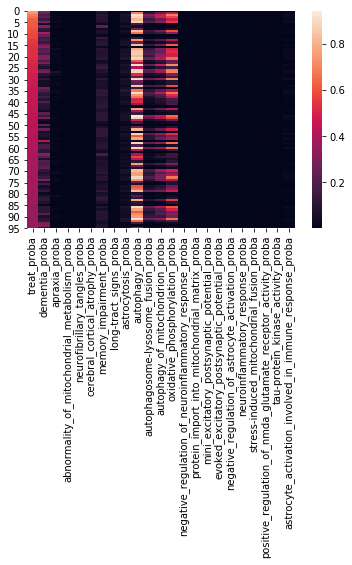

In [65]:
sns.heatmap(mrg[keep_cols])

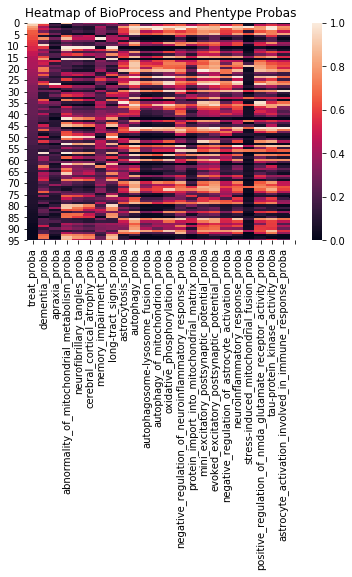

In [66]:
data_scaled = mm.fit_transform(mrg[keep_cols])

sns.heatmap(data_scaled)
plt.title('Heatmap of BioProcess and Phentype Probas')
plt.xticks(ticks=np.arange(0.5, len(keep_cols)+1, 1), labels=keep_cols, rotation=90);

In [67]:
cats = {
    'Autophagy': ['GO:0006914', 'GO:0061909', 'GO:0000045'],
    'Mitochondrial function': ['GO:0006119', 'HP:0003287', 'GO:1990046', 'GO:0030150'],
    'Neuroinflammation': ['HP:0002185', 'GO:0150076', 'GO:0150079', 'HP:0002120', 'GO:0050321'],
    'Synaptic health': ['GO:0034205', 'GO:1904783', 'GO:0098816', 'GO:0098817'],
    'Reactive astrogliosis': ['HP:0002446', 'GO:0002265', 'GO:0061889'],
    'Clinical symtopms': ['HP:0002354', 'HP:0002423', 'DOID:1307', 'DOID:0060135']
}

In [68]:
cat_to_label = {k: [id_to_name[v].lower().replace(' ', '_')+'_proba' for v in vs] for k, vs in cats.items()}

In [69]:
mrg_1 = mrg.copy()

In [70]:
mrg_1.head()

,chemicalsubstance_id,disease_id,status,proba,cid,did,treat_proba,dementia_proba,apraxia_proba,abnormality_of_mitochondrial_metabolism_proba,...,negative_regulation_of_neuroinflammatory_response_proba,protein_import_into_mitochondrial_matrix_proba,mini_excitatory_postsynaptic_potential_proba,evoked_excitatory_postsynaptic_potential_proba,negative_regulation_of_astrocyte_activation_proba,neuroinflammatory_response_proba,stress-induced_mitochondrial_fusion_proba,positive_regulation_of_nmda_glutamate_receptor_activity_proba,tau-protein_kinase_activity_proba,astrocyte_activation_involved_in_immune_response_proba
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease,0.777562,0.435943,0.004623,0.005086,...,0.001266,0.001238,0.001536,0.001836,0.001244,0.001794,0.001347,0.001740,0.001620,0.003605
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease,0.741301,0.261355,0.014681,0.002311,...,0.001502,0.001437,0.002751,0.004373,0.001409,0.006383,0.001365,0.004642,0.002132,0.019279
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease,0.695434,0.182607,0.008323,0.002111,...,0.001618,0.001691,0.003566,0.005196,0.001575,0.008281,0.001739,0.006876,0.002714,0.031020
3,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease,0.669816,0.227438,0.025073,0.002669,...,0.001643,0.001557,0.003469,0.005164,0.001454,0.007694,0.001624,0.006918,0.002729,0.029524
4,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease,0.629672,0.142639,0.012617,0.002484,...,0.001472,0.001538,0.003265,0.004680,0.001437,0.006189,0.001391,0.005760,0.002343,0.020311


In [71]:
data_scaled1 = mm.fit_transform(mrg_1[keep_cols])

In [72]:
keep_cols

['treat_proba',
 'dementia_proba',
 'apraxia_proba',
 'abnormality_of_mitochondrial_metabolism_proba',
 'neurofibrillary_tangles_proba',
 'cerebral_cortical_atrophy_proba',
 'memory_impairment_proba',
 'long-tract_signs_proba',
 'astrocytosis_proba',
 'autophagy_proba',
 'autophagosome-lysosome_fusion_proba',
 'autophagy_of_mitochondrion_proba',
 'oxidative_phosphorylation_proba',
 'negative_regulation_of_neuroinflammatory_response_proba',
 'protein_import_into_mitochondrial_matrix_proba',
 'mini_excitatory_postsynaptic_potential_proba',
 'evoked_excitatory_postsynaptic_potential_proba',
 'negative_regulation_of_astrocyte_activation_proba',
 'neuroinflammatory_response_proba',
 'stress-induced_mitochondrial_fusion_proba',
 'positive_regulation_of_nmda_glutamate_receptor_activity_proba',
 'tau-protein_kinase_activity_proba',
 'astrocyte_activation_involved_in_immune_response_proba']

In [73]:
new_data = {}
new_data['Treats AD'] = data_scaled[:, 0]
for cat, columns in cat_to_label.items():
    this_idx = [keep_cols.index(c) for c in columns if c in keep_cols]
    if cat == 'Cognative Decline':
        new_data['Clinical signs'] = data_scaled1[:, this_idx].mean(axis=1)
    else:
        new_data[cat] = data_scaled1[:, this_idx].mean(axis=1)
new_dat = pd.DataFrame(new_data)

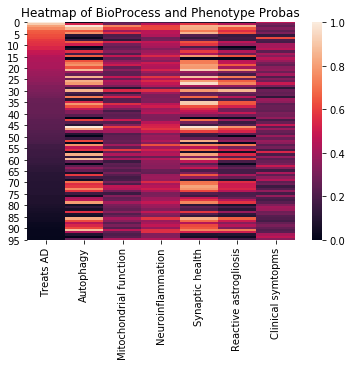

In [74]:
sns.heatmap(new_dat)
plt.title('Heatmap of BioProcess and Phenotype Probas');

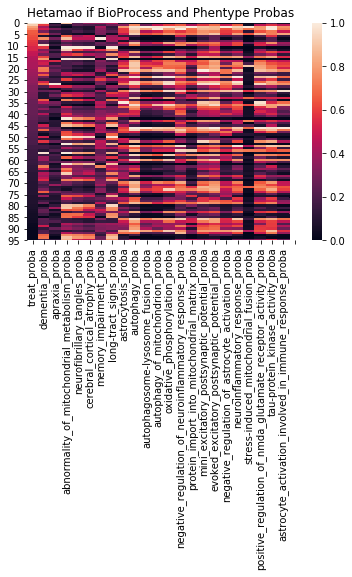

In [75]:
sns.heatmap(data_scaled)
plt.title('Hetamao if BioProcess and Phentype Probas')
plt.xticks(ticks=np.arange(0.5, len(keep_cols)+1, 1), labels=keep_cols, rotation=90);

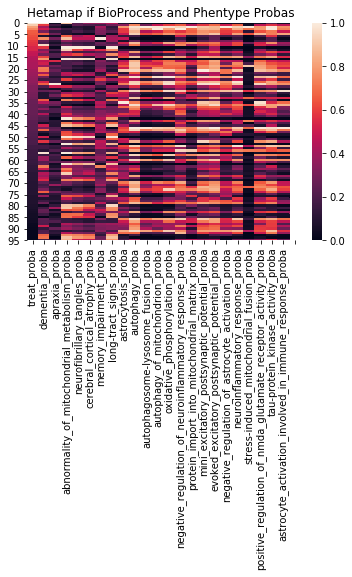

In [76]:
sns.heatmap(data_scaled)
plt.title('Hetamap if BioProcess and Phentype Probas')
plt.xticks(ticks=np.arange(0.5, len(keep_cols)+1, 1), labels=keep_cols, rotation=90);

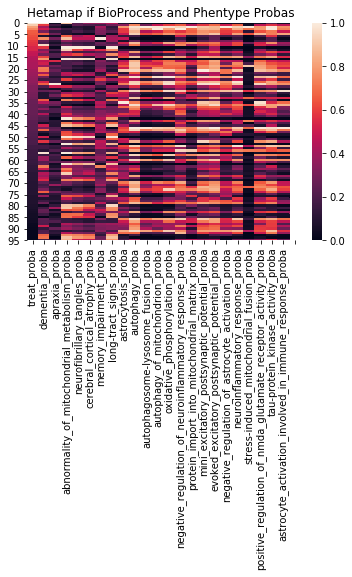

In [77]:
data_scaled1 = mm.fit_transform(mrg.sort_values(keep_cols[10], ascending=False)[keep_cols])

sns.heatmap(data_scaled)
plt.title('Hetamap if BioProcess and Phentype Probas')
plt.xticks(ticks=np.arange(0.5, len(keep_cols)+1, 1), labels=keep_cols, rotation=90);

In [78]:
mrg_mm = mrg.copy()

In [79]:
mrg_mm.loc[:, keep_cols] = mm.fit_transform(mrg[keep_cols])
mrg_mm

,chemicalsubstance_id,disease_id,status,proba,cid,did,treat_proba,dementia_proba,apraxia_proba,abnormality_of_mitochondrial_metabolism_proba,...,negative_regulation_of_neuroinflammatory_response_proba,protein_import_into_mitochondrial_matrix_proba,mini_excitatory_postsynaptic_potential_proba,evoked_excitatory_postsynaptic_potential_proba,negative_regulation_of_astrocyte_activation_proba,neuroinflammatory_response_proba,stress-induced_mitochondrial_fusion_proba,positive_regulation_of_nmda_glutamate_receptor_activity_proba,tau-protein_kinase_activity_proba,astrocyte_activation_involved_in_immune_response_proba
0,CHEBI:8354,DOID:10652,0,0.777562,pralidoxime,Alzheimer's disease,1.000000,1.000000,0.038108,0.894264,...,0.068867,0.000000,0.107494,0.090951,0.016399,0.040318,0.000000,0.050407,0.198083,0.058200
1,CHEBI:8892,DOID:10652,0,0.741301,rosiglitazone maleate,Alzheimer's disease,0.916298,0.590014,0.166400,0.060238,...,0.652547,0.437979,0.579645,0.676068,0.508406,0.667096,0.046816,0.469879,0.567980,0.468558
2,CHEBI:45713,DOID:10652,0,0.695434,trans-resveratrol,Alzheimer's disease,0.810423,0.405086,0.085300,0.000000,...,0.939330,1.000000,0.896252,0.865794,1.000000,0.926290,1.000000,0.792862,0.989514,0.775957
3,CHEBI:37537,DOID:10652,0,0.669816,phorbol 13-acetate 12-myristate,Alzheimer's disease,0.751288,0.510366,0.298958,0.167707,...,1.000000,0.703354,0.858391,0.858541,0.640551,0.846217,0.705818,0.798969,1.000000,0.736774
4,CHEBI:16240,DOID:10652,0,0.629672,hydrogen peroxide,Alzheimer's disease,0.658622,0.311229,0.140077,0.112167,...,0.576808,0.661698,0.779146,0.746772,0.589916,0.640563,0.113656,0.631576,0.721190,0.495593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CHEBI:6015,DOID:10652,0,0.349868,isoflurane,Alzheimer's disease,0.012744,0.171353,0.123423,0.858273,...,0.373789,0.431337,0.352010,0.396421,0.043657,0.286538,0.286598,0.337679,0.538326,0.258340
96,CHEBI:16842,DOID:10652,0,0.349544,formaldehyde,Alzheimer's disease,0.011996,0.164853,0.411269,0.343079,...,0.668275,0.095468,0.611804,0.673564,0.137650,0.487477,0.045459,0.484539,0.516149,0.435227
97,CHEBI:4480,DOID:10652,0,0.348165,Diacetylmonoxime,Alzheimer's disease,0.008813,0.453783,0.105552,0.963121,...,0.070839,0.000000,0.123326,0.114700,0.000000,0.013749,0.000000,0.035925,0.098757,0.007778
98,CHEBI:8060,DOID:10652,0,0.344817,Phenelzine,Alzheimer's disease,0.001085,0.372471,0.049584,0.523094,...,0.106861,0.078687,0.163292,0.183309,0.009516,0.056453,0.000000,0.033178,0.057370,0.025945


## Save out what we found here...

In [80]:
out_dir = Path('../2_pipeline').resolve().joinpath('AD_Endpoints', 'out')
out_dir.mkdir(exist_ok=True, parents=True)

In [81]:
mrg_mm.to_csv(out_dir.joinpath('top_100_probas.csv'), index=False)

In [82]:
import json

In [83]:
endpoints = {'increase_bp': inc_bp,
             'decrease_bp': dec_bp,
             'phenotypes': pheno_subset,
             'diseases': dis_subset}

with open(out_dir.joinpath('endpoints.json'), 'w') as fout:
    json.dump(endpoints, fout, indent=2)

In [84]:
with open(out_dir.joinpath('categories.json'), 'w') as fout:
    json.dump(cats, fout, indent=2)